# 561 Project Codebase (Jupyter Notebook)

## 1. Data Collection, Preprocessing, and Analysis

### 1.1 Data Collection

#### 1.1.1 Loading Data

In [ ]:
# Load the dataset as csv file as dataframe (df)

import numpy as np
import pandas as pd

# # Read travel data
# df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/Data_Sampling_Project/refs/heads/main/travel.csv")

# Read bank telemarketing dataset
df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/Data_Sampling_Project/refs/heads/main/input.csv", sep=";")

#### 1.1.2 Understanding Data

In [10]:
# Print shape
print(df.shape) # (45211, 17)

print(df.info())

# Verify data shape
print(df.head()) # 16 features + 1 target (y)

(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
   age           job  marital  education default  balance housing loan  \
0   58  

In [ ]:
# print outcome classes 
print(df['y'].value_counts())
print("\nPercentage of total samples in NO:",df['y'].value_counts()[0]/df.shape[0]*100)
print("Percentage of total samples in YES:",df['y'].value_counts()[1]/df.shape[0]*100)


no     39922
yes     5289
Name: y, dtype: int64

Percentage of total samples in NO 0.8830151954170445
Percentage of total samples in YES 0.11698480458295547


### 1.2 Data Preprocessing

#### 1.2.1 Data Cleaning

In [8]:
# identify null data
print("Number of null values in the dataset:\n{0}".format(df.isnull().sum())) 

# identify duplciate data
print("\nNumber of duplicate data in the dataset:\n{0}".format(df.duplicated().sum()))

# There are no null values and duplicate values --> no cleaning needed

Number of null values in the dataset:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Number of duplicate data in the dataset:
0


#### 1.2.2 Data Transformation

In [29]:
# Simply encode objects in the dataset

object_columns=list(df.select_dtypes(include='object').columns)

print(len(object_columns)) # 10 object columns

# object_columns # 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y'

# observe unique value and their counts
for i in object_columns:
    print(df[i].value_counts())

10
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int6

In [37]:
# Data Transformation: (OLD)
from sklearn.preprocessing import LabelEncoder

# make copy to make sure the preprocdessing step doesn't impact the original data
data=df.copy()

# 1. Encode binary variables
# Initialize LabelEncoder for binary encoding
label_encoder = LabelEncoder()

# 1.1 encode binary predictors
data['default']=label_encoder.fit_transform(data['default'])
data['housing']=label_encoder.fit_transform(data['housing'])
data['loan']=label_encoder.fit_transform(data['loan'])

# 1.2 encode binary target variable (y)
data['y']=label_encoder.fit_transform(data['y'])

# 2. encoding categorical data with multiple class (job, marital, education, contact, month, poutcome)

# 2.1 month: since months are just the abbreviations (short forms of the month) --> encode strings to months numerically
data['month']=label_encoder.fit_transform(data['month'])+1

# 2.2 education (unknown exists): map values with setted values where higher educations are mapped with higher values
data['education']=data['education'].map({"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3})

# 2.3 poutcome (unknown exists): map values with setted values where failure is 0, success is 1, unknown and otheras 0.5
data['poutcome']=data['poutcome'].map({"failure": 0, "success": 1, "unknown": 0.5, "other": 0.5})

# I decided to leave the rest untouched because tree-based methods can handle categorical data pretty well already.
# Hence I did not handle: contact, marital, and job (as of now)

# 3. replace unknown with meaningful value (for contact, education, job)

# 3.1 job, try to categorize retired and student out first based on age, then see what to do
# everyone under 22 are already students, so transform elders
data.loc[data['age'] >66, 'job'] = data.loc[data['age'] >66, 'job'].replace('unknown', 'retired')
# print(data['job'].value_counts()) # 278 unknown values now, 10 unknown ones are removed

# 3.2: contact, replace with mode--> cellular
# cellular returns 65%, unknown returns 29%, telephone returns 6%
data['contact']=data['contact'].replace("unknown", "cellular")

# 3.3 education, replace with mode--> 2
# 0: 4%, 1: 15%, 2: 51%, 3: 29%
data['education']=data['education'].replace(0, 2)

# One-hot encode 'contact', 'marital', 'job'
data=pd.get_dummies(data, columns=['contact', 'marital', 'job'])


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   education          45211 non-null  int64  
 2   default            45211 non-null  int64  
 3   balance            45211 non-null  int64  
 4   housing            45211 non-null  int64  
 5   loan               45211 non-null  int64  
 6   day                45211 non-null  int64  
 7   month              45211 non-null  int64  
 8   duration           45211 non-null  int64  
 9   campaign           45211 non-null  int64  
 10  pdays              45211 non-null  int64  
 11  previous           45211 non-null  int64  
 12  poutcome           45211 non-null  float64
 13  y                  45211 non-null  int64  
 14  contact_cellular   45211 non-null  uint8  
 15  contact_telephone  45211 non-null  uint8  
 16  marital_divorced   452

In [ ]:
"""

# make copy for safety
df_test=df.copy()

# drop poutcome: (too many unknown)



# handle other unknown




# those with simple encoding (had no/ yes) in the beginning: housing, default, loan, y

# those who can be numerical encode (had hierarchy: education, month, 

# one-hot encode: job, marital, contact)
"""


'''
Things to consider later: 
* scaling/ normalization
* outlier handling

Things didn't do on purpose
* feature engineering
* feature selection


'''

#### 1.2.3 Data Saving
* Saving output of the dataset to avoid recomputing

In [45]:
data.to_csv("Processed_Input.csv", header=True, index=False)

### 1.3 Data Analysis (Skipped On Purpose)

* Reason: Not Emphasis of the research

In [ ]:
# WILL COME BACK LATER (when time allows)

In [ ]:
# # load --> success!
# df2=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/Data_Sampling_Project/refs/heads/main/Processed_Input.csv")

## 2. Sampling 

In [5]:
import numpy as np
import pandas as pd

# load --> success!
df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/Data_Sampling_Project/refs/heads/main/Processed_Input.csv")

In [6]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'contact_cellular', 'contact_telephone', 'marital_divorced',
       'marital_married', 'marital_single', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown'],
      dtype='object')

In [7]:
# Experiment

from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Assume 'df' is your dataframe, and 'target_col' is your target variable
X = df.drop(columns=['y'])  # Features
y = df['y']                 # Target variable



In [8]:
# Step 1: Calculate mutual information
mi_scores = mutual_info_classif(X, y)
df['mutual_info'] = np.dot(X.values, mi_scores)  # Weighted MI for each row

In [10]:
df['mutual_info'].describe()

count    45211.000000
mean        48.414898
std         65.475399
min       -141.849282
25%         16.313541
50%         30.193485
75%         57.081392
max       2096.386621
Name: mutual_info, dtype: float64

In [11]:
# Step 2: Group samples into stratums (e.g., using k-means clustering)
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of stratums
df['stratum'] = kmeans.fit_predict(df[['mutual_info']])

In [13]:
# Step 3: Perform stratified undersampling
undersampled_dfs = []
for stratum, group in df.groupby('stratum'):
    # Separate the majority and minority class in the group
    majority = group[group['y'] == 0]
    minority = group[group['y'] == 1]
    
    # Undersample the majority class
    undersampled_majority = resample(
        majority,
        replace=False,
        n_samples=len(minority),  # Match minority class size
        random_state=42
    )
    
    # Combine with the minority class
    undersampled_dfs.append(pd.concat([undersampled_majority, minority]))

In [14]:
# Step 4: Combine sampled stratums
final_df = pd.concat(undersampled_dfs)

# Shuffle the resulting dataset
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
final_df

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,mutual_info,stratum
0,48,2,0,2214,0,0,19,2,607,7,...,0,0,0,0,0,0,0,0,90.021923,3
1,56,2,0,4763,1,0,28,6,106,6,...,0,0,0,1,0,0,0,0,106.091848,3
2,25,3,0,3411,0,0,19,2,225,2,...,0,0,0,0,0,1,0,0,86.527979,3
3,45,2,0,879,0,0,7,6,621,2,...,0,0,0,0,0,1,0,0,63.709115,3
4,53,2,0,428,0,0,19,2,609,4,...,0,0,0,0,0,1,0,0,53.674337,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,41,2,0,2039,0,0,25,2,160,4,...,0,0,0,0,0,1,0,0,53.981099,3
10574,39,1,0,7005,1,0,28,6,429,2,...,0,0,0,0,0,0,1,0,180.087187,1
10575,45,2,0,2353,1,0,18,9,435,7,...,0,0,0,0,0,0,0,0,82.569990,3
10576,32,3,0,233,1,0,2,1,77,2,...,0,0,0,0,0,0,0,0,14.362783,0


In [ ]:
# SPLIT

In [ ]:
# # reference code

# import pandas as pd
# import numpy as np
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.cluster import KMeans
# from sklearn.utils import resample

# # Assume 'df' is your dataframe, and 'target_col' is your target variable
# X = df.drop(columns=['target'])  # Features
# y = df['target']                 # Target variable

# # Step 1: Calculate mutual information
# mi_scores = mutual_info_classif(X, y)
# df['mutual_info'] = np.dot(X.values, mi_scores)  # Weighted MI for each row

# # Step 2: Group samples into stratums (e.g., using k-means clustering)
# kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of stratums
# df['stratum'] = kmeans.fit_predict(df[['mutual_info']])

# # Step 3: Perform stratified undersampling
# undersampled_dfs = []
# for stratum, group in df.groupby('stratum'):
#     # Separate the majority and minority class in the group
#     majority = group[group['target'] == 0]
#     minority = group[group['target'] == 1]
    
#     # Undersample the majority class
#     undersampled_majority = resample(
#         majority,
#         replace=False,
#         n_samples=len(minority),  # Match minority class size
#         random_state=42
#     )
    
#     # Combine with the minority class
#     undersampled_dfs.append(pd.concat([undersampled_majority, minority]))

# # Step 4: Combine sampled stratums
# final_df = pd.concat(undersampled_dfs)

# # Shuffle the resulting dataset
# final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)


## 3. Experiment Evaluation

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
import seaborn as sns

def evaluate_model(y_true, y_pred):
    """
    Evaluates a classification model by printing the confusion matrix, 
    classification report, class-wise metrics, and plotting the AUC-ROC 
    and precision-recall curves.
    
    Parameters:
        y_true (array-like): Actual labels
        y_pred (array-like): Predicted probabilities or labels
    """
    # Handle binary or probabilistic predictions
    y_pred_labels = np.where(y_pred >= 0.5, 1, 0) if y_pred.ndim == 1 else np.argmax(y_pred, axis=1)

    # Confusion Matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred_labels)
    print(cm)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
    plt.title('Confusion Matrix')
    plt.tight_layout()
    # plt.savefig("RF_confusion_matrix.png")


    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_labels))

    # # Class-wise Performance Metrics
    # print("\nClass-wise Performance Metrics:")
    # for class_label in range(cm.shape[0]):
    #     tp = cm[class_label, class_label]
    #     fn = cm[class_label].sum() - tp
    #     fp = cm[:, class_label].sum() - tp
    #     tn = cm.sum() - (tp + fn + fp)
    #     print(f"Class {class_label} -> TP: {tp}, FN: {fn}, FP: {fp}, TN: {tn}")

    # Class-wise Performance Metrics
    classification_report_2 = classification_report(y_test, y_pred_labels, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    class_metrics = {metric: [classification_report_2[class_name][metric] for class_name in ['0','1']] for metric in metrics}
    plt.figure(figsize=(10, 6))
    sns.heatmap(data=pd.DataFrame(class_metrics, index=['No','Yes']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Class-wise Performance Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    # plt.savefig("RF_performance_metrics.png")
    plt.show()

    
    # AUC-ROC Curve
    if len(np.unique(y_true)) == 2:  # Binary classification
        roc_auc = roc_auc_score(y_true, y_pred)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        plt.figure(figsize=(10, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("AUC-ROC Curve")
        plt.legend(loc="lower right")
        plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall, precision)
    avg_precision = average_precision_score(y_true, y_pred)
    plt.figure(figsize=(10, 5))
    plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.show()

    print(f"Average Precision Score: {avg_precision:.2f}")


### 3.1 Baseline (no stratified SRS)

In [18]:
import numpy as np
import pandas as pd

# load --> success!
baseline_df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/Data_Sampling_Project/refs/heads/main/Processed_Input.csv")

In [19]:
print(baseline_df.shape)
baseline_df.head()

(45211, 31)


,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,3,0,2143,1,0,5,9,261,1,...,0,0,1,0,0,0,0,0,0,0
1,44,2,0,29,1,0,5,9,151,1,...,0,0,0,0,0,0,0,1,0,0
2,33,2,0,2,1,1,5,9,76,1,...,1,0,0,0,0,0,0,0,0,0
3,47,2,0,1506,1,0,5,9,92,1,...,0,0,0,0,0,0,0,0,0,0
4,33,2,0,1,0,0,5,9,198,1,...,0,0,0,0,0,0,0,0,0,1


In [20]:
X = baseline_df.drop(columns=['y'])  # Features
y = baseline_df['y']    

In [ ]:
# Implement Random Forest:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import check_random_state

# set random seed for code reproducability
random_state=check_random_state(42)

# 1. data splitting into train-test-validation split (80-10-10)
# first split train as 80%, rest 20%
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# # split the remaining 20% by half (10% test, 10% validation)
# X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=7)

# 2. train and fit a decision tree model using the training data
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

# 2.1 make predictions on the testing data based on the pre-tuned model fitted with training data
RF_y_train_pred=RF.predict(X_test)
# Accuracy Score, they are around 85-90%
print("Training (Pre-tuned) Accuracy on Decision Tree: {}".format(accuracy_score(y_test, RF_y_train_pred)))

Training (Pre-tuned) Accuracy on Decision Tree: 0.899037929890523


Confusion Matrix:
[[7729  223]
 [ 690  401]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043



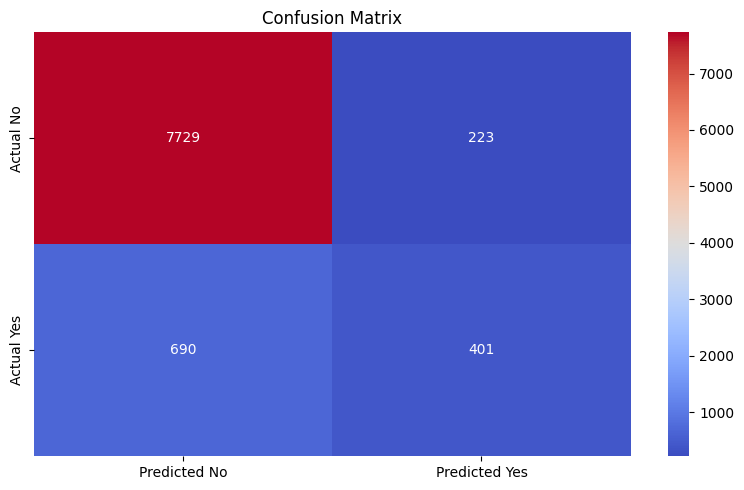

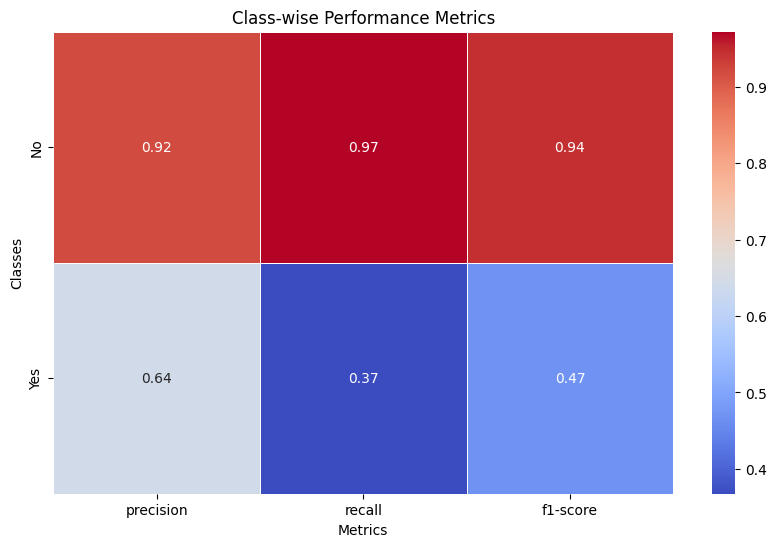

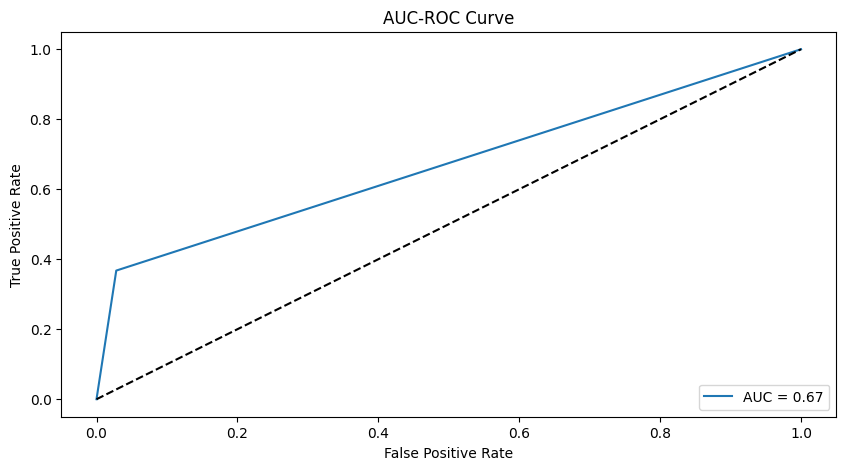

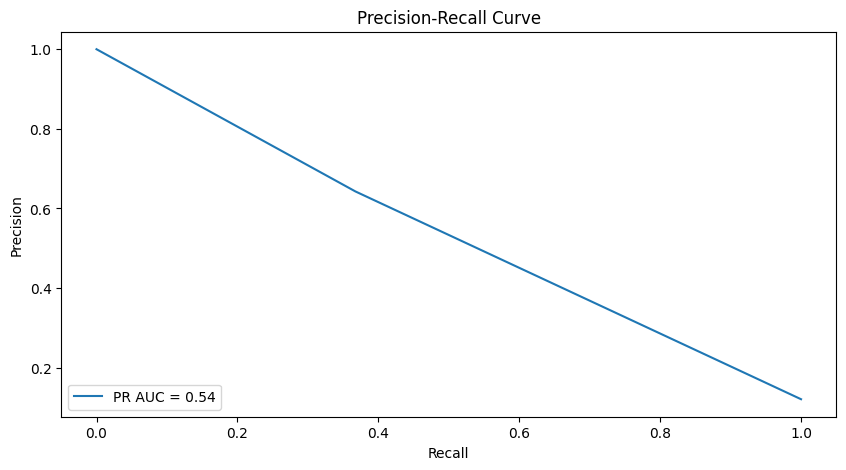

Average Precision Score: 0.31


In [33]:
# print 
evaluate_model(y_test, RF_y_train_pred)

### 3.2 Treatment (MI)

In [37]:
# final_df is the experiment one, df is the original one

# drop MI
experiment_df=final_df.drop(columns=['mutual_info', 'stratum'])

In [38]:
print(experiment_df.shape)
experiment_df.head()

(10578, 31)


,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,48,2,0,2214,0,0,19,2,607,7,...,0,0,0,0,0,0,0,0,0,0
1,56,2,0,4763,1,0,28,6,106,6,...,0,0,0,0,0,1,0,0,0,0
2,25,3,0,3411,0,0,19,2,225,2,...,0,0,0,0,0,0,0,1,0,0
3,45,2,0,879,0,0,7,6,621,2,...,0,0,0,0,0,0,0,1,0,0
4,53,2,0,428,0,0,19,2,609,4,...,0,0,0,0,0,0,0,1,0,0


In [40]:
X = experiment_df.drop(columns=['y'])  # Features
y = experiment_df['y']  

In [41]:
# set random seed for code reproducability
random_state=check_random_state(42)

# 1. data splitting into train-test-validation split (80-10-10)
# first split train as 80%, rest 20%
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# # split the remaining 20% by half (10% test, 10% validation)
# X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=7)

# 2. train and fit a decision tree model using the training data
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

# 2.1 make predictions on the testing data based on the pre-tuned model fitted with training data
RF_y_train_pred=RF.predict(X_test)
# Accuracy Score, they are around 85-90%
print("Training (Pre-tuned) Accuracy on Decision Tree: {}".format(accuracy_score(y_test, RF_y_train_pred)))

Training (Pre-tuned) Accuracy on Decision Tree: 0.8000945179584121


Confusion Matrix:
[[830 260]
 [163 863]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1090
           1       0.77      0.84      0.80      1026

    accuracy                           0.80      2116
   macro avg       0.80      0.80      0.80      2116
weighted avg       0.80      0.80      0.80      2116



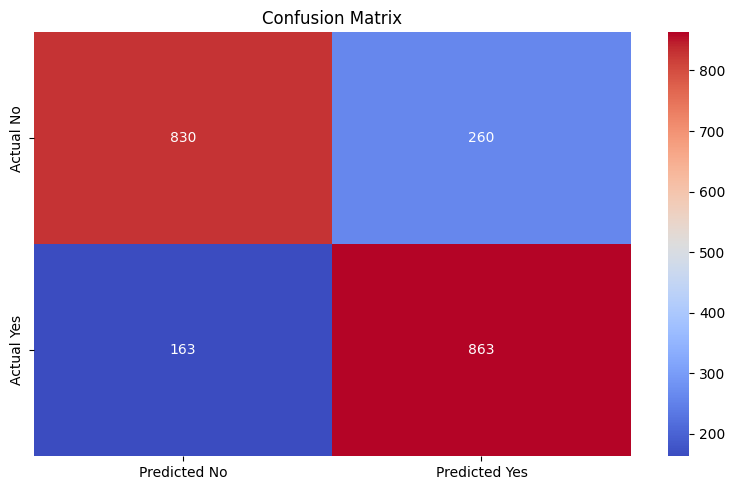

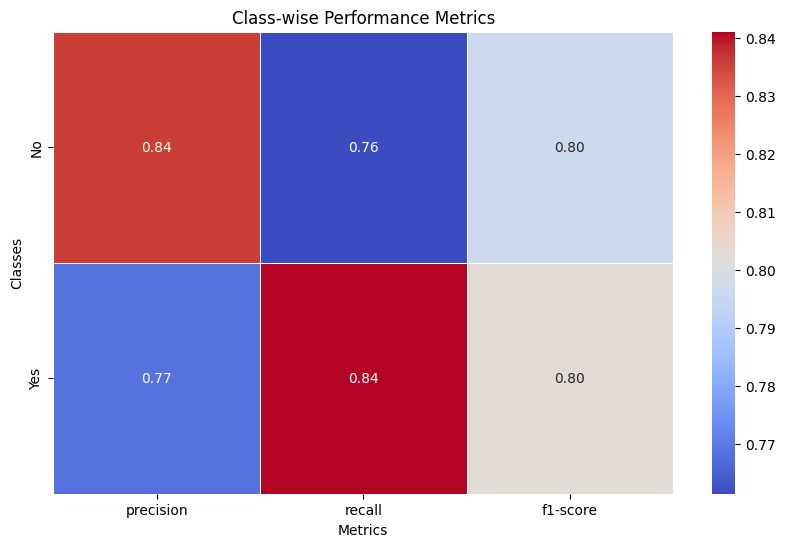

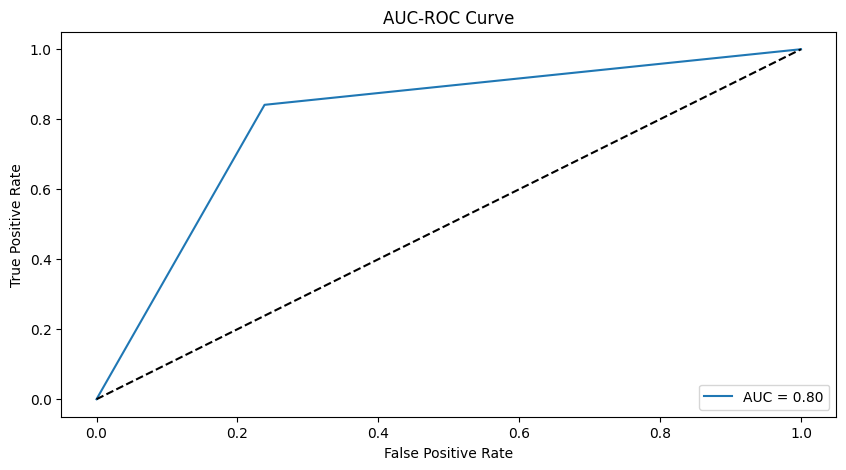

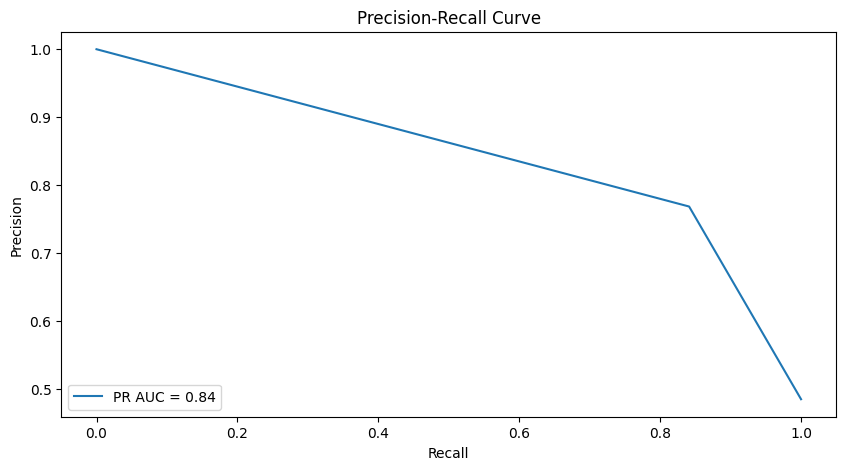

Average Precision Score: 0.72


In [42]:
evaluate_model(y_test, RF_y_train_pred)